In [1]:
import matplotlib.pyplot as plt
import json
import re

In [2]:
frequence_list = json.load(open("frequence_list.json", "r"))

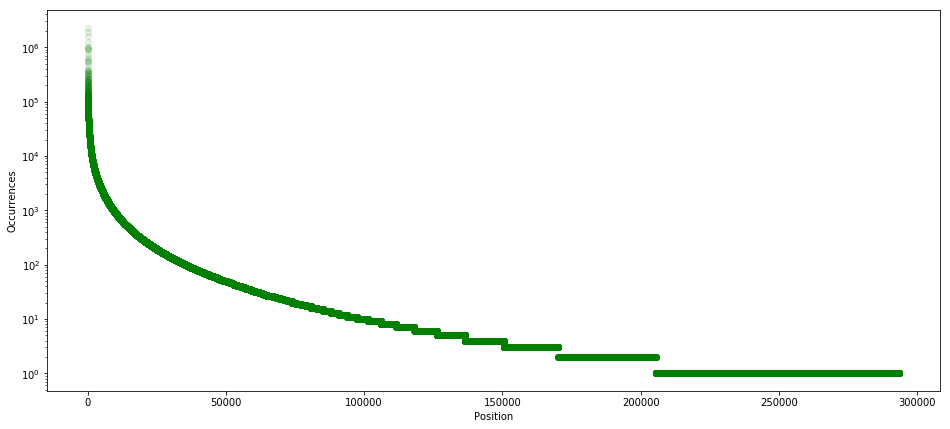

In [3]:
x = [x for x in range(len(frequence_list))]
y = [y for x, y in frequence_list]

plt.figure(figsize=(16, 7))
plt.scatter(x, y, alpha=0.1, c="green")
plt.gca().set_yscale("log")


plt.xlabel("Position")
plt.ylabel("Occurrences")
plt.show()

In [4]:
polish_words = set()

for line in open("polimorfologik-2.1.txt", "r").readlines():
    l, r = re.match("^([^;]+);([^;]+)", line.lower()).group(1, 2)
    polish_words.update((l, r))
    
print(len(polish_words))

4623869


In [5]:
not_in_polish_words = [x[0] for x in frequence_list if x[0] not in polish_words]
print(len(not_in_polish_words))


45300


In [6]:
import random
random.shuffle(not_in_polish_words)
print(not_in_polish_words[:30])

trzewikowska
zkoda
przytchawicze
zalaminował
pryzmowe
organizacyjnoprawną
poddewastowanych
świede
raalte
trybulec
wzp
musiwykazać
jednoczesnie
federal
metycylinowrażliwym
subterapeutycznych
zmostkowanie
śródręczo
jastrzebski
pozaleczniczych
chruscińska
wcześniejz
fiskalizowane
przerzucalności
przeiczenie
itron
średniomięśniowe
konsorcyjnym
determinowaloby
nowowybranych


In [7]:
from collections import Counter

WORDS = Counter({k: v for (k, v) in frequence_list})


def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'aąbcćdeęfghijklłmnńoóprsśtuwyzźż'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [8]:
print(
    "\n".join(
        ["{:20s} -> {:20s}".format(w, correction(w)) for w in not_in_polish_words[:30]]
    )
)

trzewikowska         -> trzewikowska        
zkoda                -> zkoda               
przytchawicze        -> przytchawicze       
zalaminował          -> zalaminował         
pryzmowe             -> pryzmowe            
organizacyjnoprawną  -> organizacyjnoprawną 
poddewastowanych     -> poddewastowanych    
świede               -> świede              
raalte               -> raalte              
trybulec             -> trybulec            
wzp                  -> wzp                 
musiwykazać          -> musiwykazać         
jednoczesnie         -> jednoczesnie        
federal              -> federal             
metycylinowrażliwym  -> metycylinowrażliwym 
subterapeutycznych   -> subterapeutycznych  
zmostkowanie         -> zmostkowanie        
śródręczo            -> śródręczo           
jastrzebski          -> jastrzebski         
pozaleczniczych      -> pozaleczniczych     
chruscińska          -> chruscińska         
wcześniejz           -> wcześniejz          
fiskalizow